In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Analysis of covid dataset using R and python
# Insights from the OWID COVID-19 Dataset.

In [3]:
df=pd.read_csv("covid.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/3/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350080,ZWE,Africa,Zimbabwe,10/14/2023,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
350081,ZWE,Africa,Zimbabwe,10/15/2023,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
350082,ZWE,Africa,Zimbabwe,10/16/2023,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
350083,ZWE,Africa,Zimbabwe,10/17/2023,265808.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [4]:
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/3/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350085 non-null  object 
 1   continent                                   333420 non-null  object 
 2   location                                    350085 non-null  object 
 3   date                                        350085 non-null  object 
 4   total_cases                                 312088 non-null  float64
 5   new_cases                                   340457 non-null  float64
 6   new_cases_smoothed                          339198 non-null  float64
 7   total_deaths                                290501 non-null  float64
 8   new_deaths                                  340511 non-null  float64
 9   new_deaths_smoothed                         339281 non-null  float64
 

In [6]:
total_cases = df['total_cases'].max()  # Maximum cases recorded globally
total_deaths = df['total_deaths'].max()  # Maximum deaths recorded globally
total_vaccinations = df['total_vaccinations'].max()  # Total vaccinations (if available)

print(f"Total Global Cases: {total_cases:,}")
print(f"Total Global Deaths: {total_deaths:,}")
print(f"Total Global Vaccinations: {total_vaccinations:,}")

Total Global Cases: 771,407,061.0
Total Global Deaths: 6,972,139.0
Total Global Vaccinations: 13,515,050,351.0


In [7]:

# Step 3: Ensure Numeric Columns for Aggregation
# First, ensure the relevant columns are numeric and remove any non-numeric columns from the aggregation
df['total_cases'] = pd.to_numeric(df['total_cases'], errors='coerce')
df['total_deaths'] = pd.to_numeric(df['total_deaths'], errors='coerce')

# Step 4: Group by Country and Extract Maximum Values for Cases and Deaths
country_data = df.groupby('location')[['total_cases', 'total_deaths']].max()

# Countries with the highest and lowest total cases
highest_cases = country_data[['total_cases']].nlargest(10, 'total_cases')
lowest_cases = country_data[['total_cases']].nsmallest(10, 'total_cases')

# Countries with the highest and lowest total deaths
highest_deaths = country_data[['total_deaths']].nlargest(10, 'total_deaths')
lowest_deaths = country_data[['total_deaths']].nsmallest(10, 'total_deaths')

# Step 5: Display the Results
print("\n--- Top 10 Countries with Highest Total Cases ---")
print(highest_cases)

print("\n--- Top 10 Countries with Lowest Total Cases ---")
print(lowest_cases)

print("\n--- Top 10 Countries with Highest Total Deaths ---")
print(highest_deaths)

print("\n--- Top 10 Countries with Lowest Total Deaths ---")
print(lowest_deaths)



--- Top 10 Countries with Highest Total Cases ---
                     total_cases
location                        
World                771407061.0
High income          425988398.0
Asia                 300681974.0
Europe               249783754.0
Upper middle income  244463792.0
European Union       184210531.0
North America        124492151.0
United States        103436829.0
China                 99315684.0
Lower middle income   97458491.0

--- Top 10 Countries with Lowest Total Cases ---
                           total_cases
location                              
Pitcairn                           4.0
Vatican                           26.0
Tokelau                           80.0
Niue                             887.0
Montserrat                      1403.0
Falkland Islands                1923.0
Saint Helena                    2166.0
Tuvalu                          2943.0
Saint Pierre and Miquelon       3426.0
Wallis and Futuna               3550.0

--- Top 10 Countries with Highest 

In [8]:
# Find the country with the highest vaccination coverage
highest_vaccination = df.loc[df['people_vaccinated_per_hundred'].idxmax()]

# Display the result
print(f"Country with the Highest Vaccination Coverage: {highest_vaccination['location']}, Vaccinated Percentage: {highest_vaccination['people_vaccinated_per_hundred']}")


Country with the Highest Vaccination Coverage: Gibraltar, Vaccinated Percentage: 129.07


In [9]:
# Calculate Global Case Fatality Rate (CFR)
global_cases = df['total_cases'].sum()  # Total global cases
global_deaths = df['total_deaths'].sum()  # Total global deaths

# Calculate Case Fatality Rate (CFR)
cfr_global = global_deaths / global_cases * 100  # Multiply by 100 to get the percentage

# Display the result
print(f"Global Case Fatality Rate (CFR): {cfr_global:.2f}%")


Global Case Fatality Rate (CFR): 1.20%


Total New Cases: 3268943666.0
Total New Deaths: 29117455.0
Max Daily New Cases: 8401961.0
Max Daily New Deaths: 27939.0
Min Daily New Cases: 0.0
Min Daily New Deaths: 0.0
Average Daily New Cases: 9601.634467788885
Average Daily New Deaths: 85.51105544314281

Smoothed (7-day moving average) Trends:
Max Smoothed New Cases: 6402036.285714285
Max Smoothed New Deaths: 14822.0
Min Smoothed New Cases: 0.0
Min Smoothed New Deaths: 0.0
Average Smoothed New Cases: 9617.435344546768
Average Smoothed New Deaths: 85.5987738983337


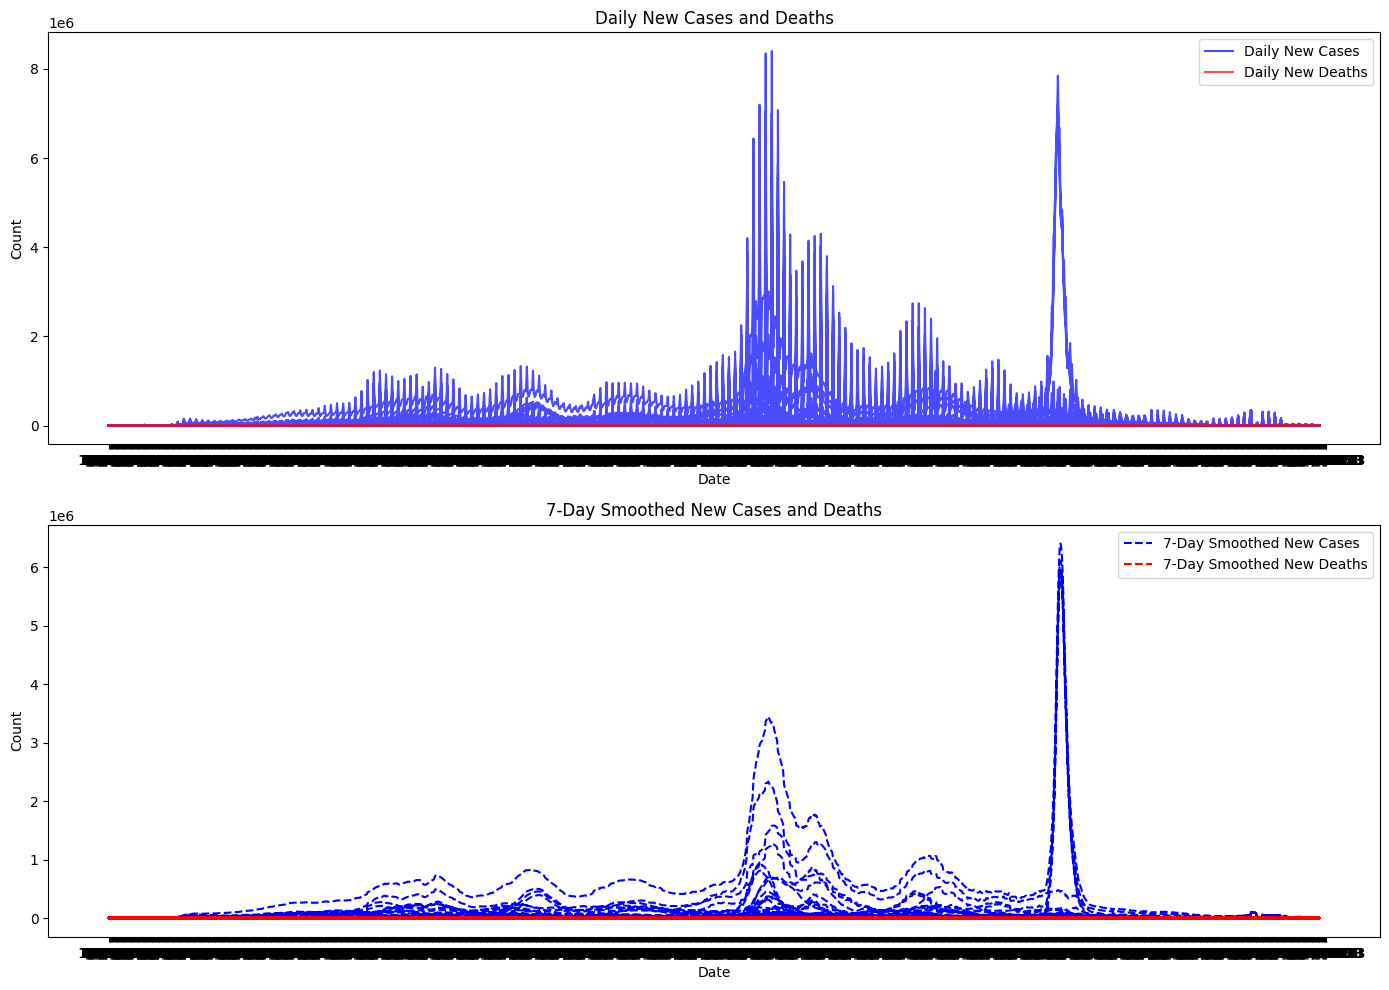

In [10]:

# Assuming 'df' is the DataFrame containing 'date', 'new_cases', 'new_deaths' columns.
# If you have different column names or need to calculate new columns, adjust as needed.

# Step 1: Calculate daily new cases and deaths metrics (total, max, min, average)
total_new_cases = df['new_cases'].sum()
total_new_deaths = df['new_deaths'].sum()

max_daily_new_cases = df['new_cases'].max()
max_daily_new_deaths = df['new_deaths'].max()

min_daily_new_cases = df['new_cases'].min()
min_daily_new_deaths = df['new_deaths'].min()

avg_daily_new_cases = df['new_cases'].mean()
avg_daily_new_deaths = df['new_deaths'].mean()

# Step 2: Calculate smoothed (7-day moving average) new cases and deaths
df['smoothed_new_cases'] = df['new_cases'].rolling(window=7).mean()
df['smoothed_new_deaths'] = df['new_deaths'].rolling(window=7).mean()

max_smoothed_new_cases = df['smoothed_new_cases'].max()
max_smoothed_new_deaths = df['smoothed_new_deaths'].max()

min_smoothed_new_cases = df['smoothed_new_cases'].min()
min_smoothed_new_deaths = df['smoothed_new_deaths'].min()

avg_smoothed_new_cases = df['smoothed_new_cases'].mean()
avg_smoothed_new_deaths = df['smoothed_new_deaths'].mean()

# Display numeric results
print(f"Total New Cases: {total_new_cases}")
print(f"Total New Deaths: {total_new_deaths}")
print(f"Max Daily New Cases: {max_daily_new_cases}")
print(f"Max Daily New Deaths: {max_daily_new_deaths}")
print(f"Min Daily New Cases: {min_daily_new_cases}")
print(f"Min Daily New Deaths: {min_daily_new_deaths}")
print(f"Average Daily New Cases: {avg_daily_new_cases}")
print(f"Average Daily New Deaths: {avg_daily_new_deaths}")

print("\nSmoothed (7-day moving average) Trends:")
print(f"Max Smoothed New Cases: {max_smoothed_new_cases}")
print(f"Max Smoothed New Deaths: {max_smoothed_new_deaths}")
print(f"Min Smoothed New Cases: {min_smoothed_new_cases}")
print(f"Min Smoothed New Deaths: {min_smoothed_new_deaths}")
print(f"Average Smoothed New Cases: {avg_smoothed_new_cases}")
print(f"Average Smoothed New Deaths: {avg_smoothed_new_deaths}")

# Step 3: Create graphs for daily and smoothed new cases and deaths
plt.figure(figsize=(14, 10))

# Plot for daily new cases and deaths
plt.subplot(2, 1, 1)
plt.plot(df['date'], df['new_cases'], label='Daily New Cases', color='blue', alpha=0.7)
plt.plot(df['date'], df['new_deaths'], label='Daily New Deaths', color='red', alpha=0.7)
plt.title('Daily New Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Plot for smoothed new cases and deaths
plt.subplot(2, 1, 2)
plt.plot(df['date'], df['smoothed_new_cases'], label='7-Day Smoothed New Cases', color='blue', linestyle='--')
plt.plot(df['date'], df['smoothed_new_deaths'], label='7-Day Smoothed New Deaths', color='red', linestyle='--')
plt.title('7-Day Smoothed New Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Show the graphs
plt.tight_layout()
plt.show()


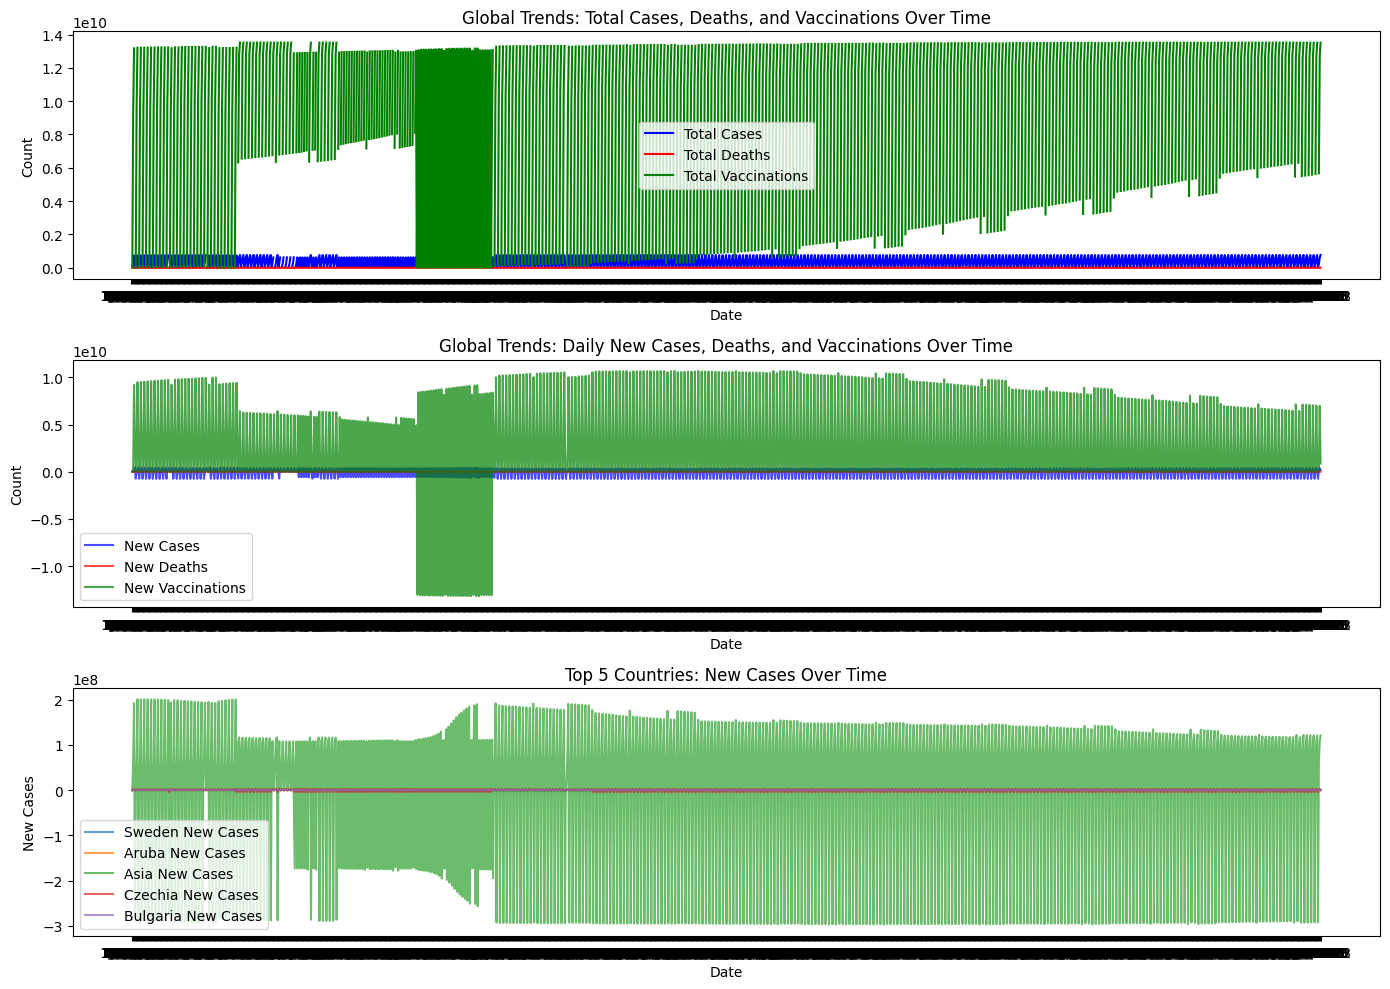

Global Total Cases: 770772702.0
Global Total Deaths: 6965280.0
Global Total Vaccinations: 13509667743.0

Sweden Total Cases: 2715145.0
Sweden Total Deaths: 24743.0
Sweden Total Vaccinations: nan

Aruba Total Cases: 44224.0
Aruba Total Deaths: 292.0
Aruba Total Vaccinations: nan

Asia Total Cases: 300585235.0
Asia Total Deaths: 1633519.0
Asia Total Vaccinations: 9074867281.0

Czechia Total Cases: 4645366.0
Czechia Total Deaths: 42827.0
Czechia Total Vaccinations: nan

Bulgaria Total Cases: 1300286.0
Bulgaria Total Deaths: 38406.0
Bulgaria Total Vaccinations: nan


In [11]:

# Assuming 'df' contains 'date', 'total_cases', 'total_deaths', 'total_vaccinations', and 'location' columns.
# Adjust column names as per your dataset.

# Step 1: Calculate global trends
global_trends = df.groupby('date').agg({
    'total_cases': 'max',  # Max total cases on each date globally
    'total_deaths': 'max',  # Max total deaths on each date globally
    'total_vaccinations': 'max'  # Max total vaccinations on each date globally
}).reset_index()

# Calculate global daily new cases, deaths, and vaccinations
global_trends['new_cases'] = global_trends['total_cases'].diff().fillna(0)
global_trends['new_deaths'] = global_trends['total_deaths'].diff().fillna(0)
global_trends['new_vaccinations'] = global_trends['total_vaccinations'].diff().fillna(0)

# Step 2: Calculate country-level trends (for selected countries or all countries)
# Get the latest total values by country
country_trends = df.groupby(['location', 'date']).agg({
    'total_cases': 'max',
    'total_deaths': 'max',
    'total_vaccinations': 'max'
}).reset_index()

# Calculate daily new cases, deaths, and vaccinations for each country
country_trends['new_cases'] = country_trends.groupby('location')['total_cases'].diff().fillna(0)
country_trends['new_deaths'] = country_trends.groupby('location')['total_deaths'].diff().fillna(0)
country_trends['new_vaccinations'] = country_trends.groupby('location')['total_vaccinations'].diff().fillna(0)

# Step 3: Global trends visualization (Cases, Deaths, and Vaccinations)
plt.figure(figsize=(14, 10))

# Plot for global total cases, deaths, and vaccinations over time
plt.subplot(3, 1, 1)
plt.plot(global_trends['date'], global_trends['total_cases'], label='Total Cases', color='blue')
plt.plot(global_trends['date'], global_trends['total_deaths'], label='Total Deaths', color='red')
plt.plot(global_trends['date'], global_trends['total_vaccinations'], label='Total Vaccinations', color='green')
plt.title('Global Trends: Total Cases, Deaths, and Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Step 4: Plotting the daily new cases, deaths, and vaccinations globally
plt.subplot(3, 1, 2)
plt.plot(global_trends['date'], global_trends['new_cases'], label='New Cases', color='blue', alpha=0.7)
plt.plot(global_trends['date'], global_trends['new_deaths'], label='New Deaths', color='red', alpha=0.7)
plt.plot(global_trends['date'], global_trends['new_vaccinations'], label='New Vaccinations', color='green', alpha=0.7)
plt.title('Global Trends: Daily New Cases, Deaths, and Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Step 5: Country-specific trends (e.g., for top 5 countries)
top_countries = country_trends['location'].value_counts().head(5).index
plt.subplot(3, 1, 3)
for country in top_countries:
    country_data = country_trends[country_trends['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=f'{country} New Cases', alpha=0.7)
plt.title('Top 5 Countries: New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()

# Step 6: Display the graphs
plt.tight_layout()
plt.show()

# Numeric Analysis for Global Trends (cases, deaths, vaccinations)
total_cases_global = global_trends['total_cases'].iloc[-1]
total_deaths_global = global_trends['total_deaths'].iloc[-1]
total_vaccinations_global = global_trends['total_vaccinations'].iloc[-1]

print(f"Global Total Cases: {total_cases_global}")
print(f"Global Total Deaths: {total_deaths_global}")
print(f"Global Total Vaccinations: {total_vaccinations_global}")

# Numeric Analysis for Top Countries (new cases)
for country in top_countries:
    country_data = country_trends[country_trends['location'] == country]
    total_cases_country = country_data['total_cases'].iloc[-1]
    total_deaths_country = country_data['total_deaths'].iloc[-1]
    total_vaccinations_country = country_data['total_vaccinations'].iloc[-1]
    
    print(f"\n{country} Total Cases: {total_cases_country}")
    print(f"{country} Total Deaths: {total_deaths_country}")
    print(f"{country} Total Vaccinations: {total_vaccinations_country}")


Peak in New Cases:
             date    new_cases
345924 2023-10-18  771400462.0

Peak in New Deaths:
             date  new_deaths
345924 2023-10-18   6972059.0

Peak in New Vaccinations:
             date  new_vaccinations
345883 2023-09-07      1.350750e+10


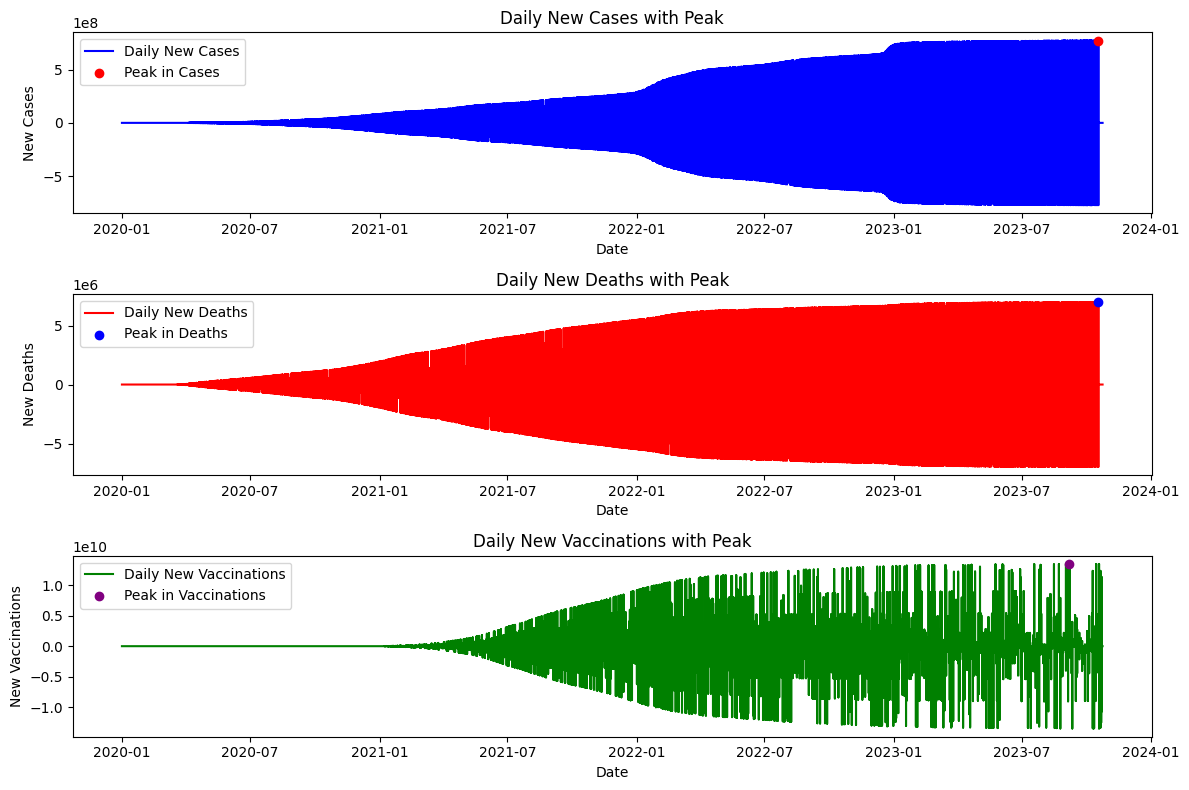

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' contains 'date', 'total_cases', 'total_deaths', 'total_vaccinations' columns

# Step 1: Calculate daily new cases, deaths, and vaccinations globally
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is in datetime format
df = df.sort_values(by='date')  # Sort by date

df['new_cases'] = df['total_cases'].diff().fillna(0)
df['new_deaths'] = df['total_deaths'].diff().fillna(0)
df['new_vaccinations'] = df['total_vaccinations'].diff().fillna(0)

# Step 2: Identify peaks (maxima) in daily new cases, deaths, and vaccinations
peak_cases = df[df['new_cases'] == df['new_cases'].max()]
peak_deaths = df[df['new_deaths'] == df['new_deaths'].max()]
peak_vaccinations = df[df['new_vaccinations'] == df['new_vaccinations'].max()]

# Step 3: Display the peaks (dates and values)
print("Peak in New Cases:")
print(peak_cases[['date', 'new_cases']])

print("\nPeak in New Deaths:")
print(peak_deaths[['date', 'new_deaths']])

print("\nPeak in New Vaccinations:")
print(peak_vaccinations[['date', 'new_vaccinations']])

# Optional: Plotting the trends for better visualization
plt.figure(figsize=(12, 8))

# Plot daily new cases
plt.subplot(3, 1, 1)
plt.plot(df['date'], df['new_cases'], label='Daily New Cases', color='blue')
plt.scatter(peak_cases['date'], peak_cases['new_cases'], color='red', label='Peak in Cases', zorder=5)
plt.title('Daily New Cases with Peak')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()

# Plot daily new deaths
plt.subplot(3, 1, 2)
plt.plot(df['date'], df['new_deaths'], label='Daily New Deaths', color='red')
plt.scatter(peak_deaths['date'], peak_deaths['new_deaths'], color='blue', label='Peak in Deaths', zorder=5)
plt.title('Daily New Deaths with Peak')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.legend()

# Plot daily new vaccinations
plt.subplot(3, 1, 3)
plt.plot(df['date'], df['new_vaccinations'], label='Daily New Vaccinations', color='green')
plt.scatter(peak_vaccinations['date'], peak_vaccinations['new_vaccinations'], color='purple', label='Peak in Vaccinations', zorder=5)
plt.title('Daily New Vaccinations with Peak')
plt.xlabel('Date')
plt.ylabel('New Vaccinations')
plt.legend()

# Display all plots
plt.tight_layout()
plt.show()


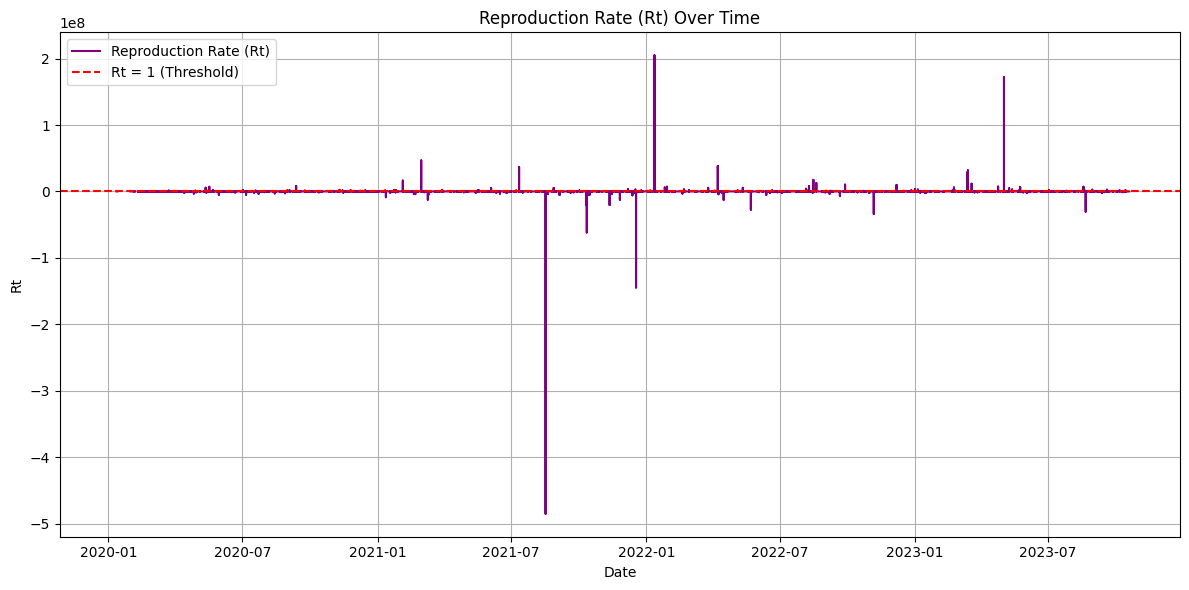

Peak Rt Values:
             date   Rt
132920 2020-01-04  inf
332258 2020-01-10  inf
60979  2020-01-20  inf
60985  2020-01-26  inf
60986  2020-01-27  inf
...           ...  ...
244911 2023-04-15  inf
330717 2023-05-23  inf
149327 2023-05-26  inf
13707  2023-05-27  inf
142511 2023-09-12  inf

[242 rows x 2 columns]

Trough Rt Values:
             date   Rt
98294  2020-01-12 -inf
308718 2020-01-15 -inf
96907  2020-01-15 -inf
152266 2020-01-22 -inf
296297 2020-01-28 -inf
...           ...  ...
895    2022-06-16 -inf
124357 2023-02-09 -inf
315523 2023-07-03 -inf
193162 2023-08-22 -inf
72035  2023-10-12 -inf

[204 rows x 2 columns]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' contains 'date' and 'total_cases' columns

# Step 1: Calculate daily new cases
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is in datetime format
df = df.sort_values(by='date')  # Sort by date

df['new_cases'] = df['total_cases'].diff().fillna(0)  # New cases = difference between days

# Step 2: Calculate Rt (Reproduction Rate)
window_size = 7  # Use a 7-day rolling window for averaging
df['rolling_avg_cases'] = df['new_cases'].rolling(window=window_size).mean()

# Calculate Rt by dividing the new cases by the rolling average of the past days
df['Rt'] = df['new_cases'] / df['rolling_avg_cases'].shift(1)  # Shift by 1 day to avoid division by 0

# Step 3: Plot Rt over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Rt'], label="Reproduction Rate (Rt)", color='purple')
plt.axhline(y=1, color='red', linestyle='--', label='Rt = 1 (Threshold)')
plt.title('Reproduction Rate (Rt) Over Time')
plt.xlabel('Date')
plt.ylabel('Rt')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Display numerical values of Rt for key dates (e.g., peaks or significant points)
peaks = df[df['Rt'] == df['Rt'].max()]
troughs = df[df['Rt'] == df['Rt'].min()]

print("Peak Rt Values:")
print(peaks[['date', 'Rt']])

print("\nTrough Rt Values:")
print(troughs[['date', 'Rt']])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9872\3445525759.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9872\3445525759.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


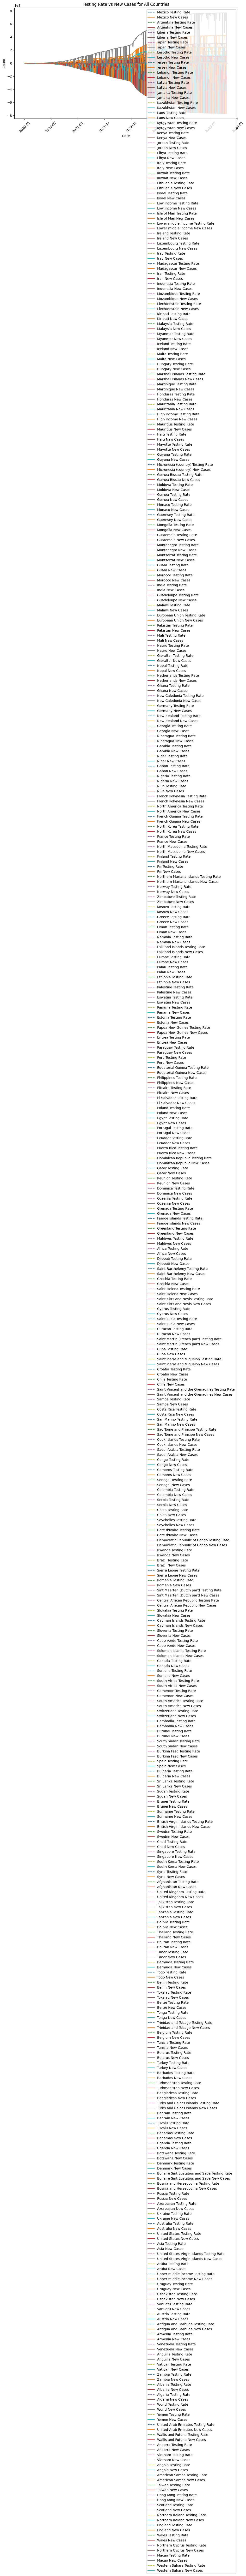

In [14]:
# Assuming 'df' is your DataFrame with columns: 'new_tests', 'population', 'new_cases', 'location', and 'date'

# Calculate testing rates (tests per 1000 people)
df['testing_rate'] = df['new_tests'] / df['population'] * 1000  # tests per thousand people
# Plot testing rates vs new cases for all countries (group by 'location')
plt.figure(figsize=(12, 6))

# Loop over each country and plot the data
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['testing_rate'], label=f'{country} Testing Rate', linestyle='--')
    plt.plot(country_data['date'], country_data['new_cases'], label=f'{country} New Cases')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Testing Rate vs New Cases for All Countries')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


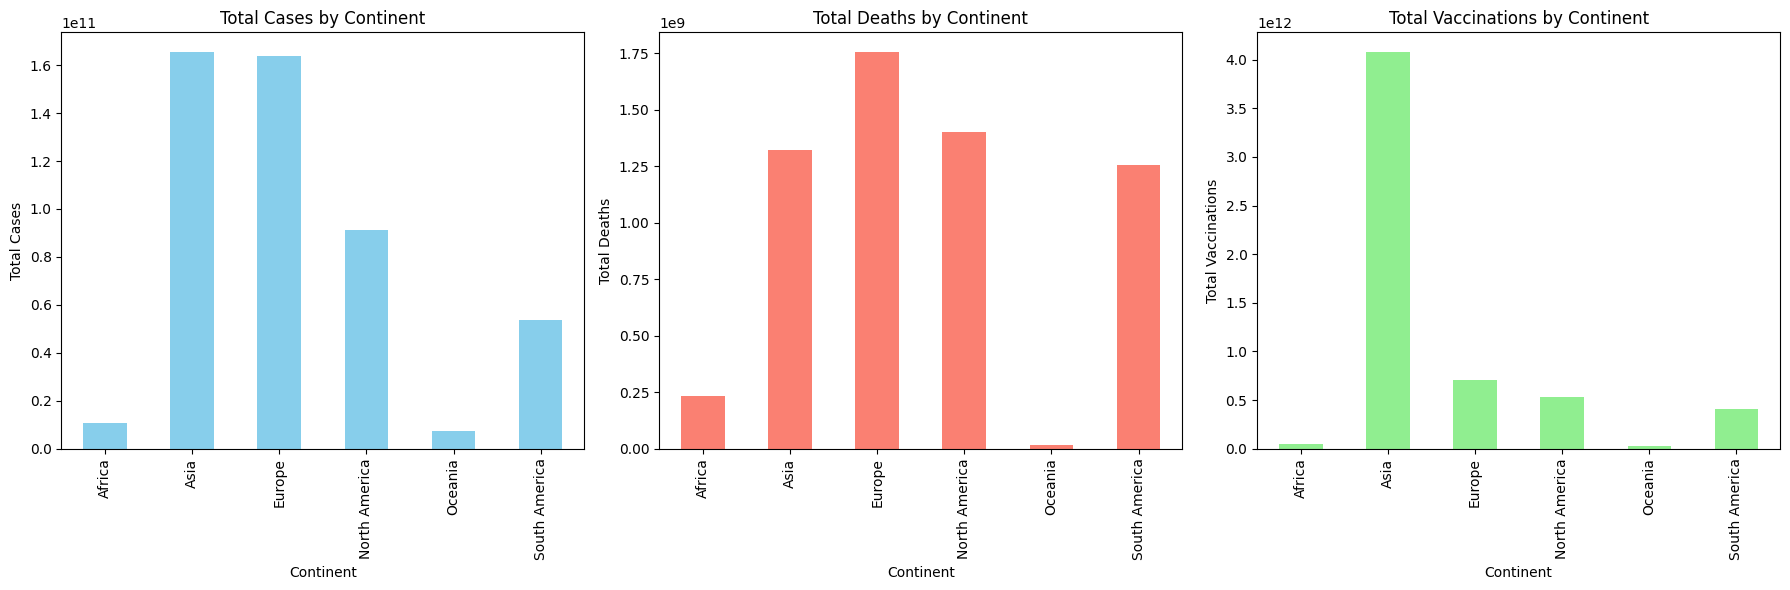

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns: 'continent', 'total_cases', 'total_deaths', 'total_vaccinations'

# Group the data by continent and calculate the total for each metric
continent_summary = df.groupby('continent')[['total_cases', 'total_deaths', 'total_vaccinations']].sum()

# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Total Cases Bar Plot
continent_summary['total_cases'].plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Total Cases by Continent')
ax[0].set_xlabel('Continent')
ax[0].set_ylabel('Total Cases')

# Total Deaths Bar Plot
continent_summary['total_deaths'].plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('Total Deaths by Continent')
ax[1].set_xlabel('Continent')
ax[1].set_ylabel('Total Deaths')

# Total Vaccinations Bar Plot
continent_summary['total_vaccinations'].plot(kind='bar', ax=ax[2], color='lightgreen')
ax[2].set_title('Total Vaccinations by Continent')
ax[2].set_xlabel('Continent')
ax[2].set_ylabel('Total Vaccinations')

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:

# Calculate cases per million and deaths per million
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1_000_000
df['deaths_per_million'] = (df['total_deaths'] / df['population']) * 1_000_000

# Sort countries by cases per million in descending order and take the top 10
top_cases = df[['location', 'cases_per_million']].sort_values(by='cases_per_million', ascending=False).head(10)

# Sort countries by deaths per million in descending order and take the top 10
top_deaths = df[['location', 'deaths_per_million']].sort_values(by='deaths_per_million', ascending=False).head(10)

# Display the results
print("Top 10 Countries by Cases per Million:")
print(top_cases)

print("\nTop 10 Countries by Deaths per Million:")
print(top_deaths)


Top 10 Countries by Cases per Million:
      location  cases_per_million
76112   Cyprus      737554.505713
76111   Cyprus      737554.505713
76113   Cyprus      737554.505713
76069   Cyprus      737554.505713
76182   Cyprus      737554.505713
76068   Cyprus      737554.505713
76192   Cyprus      737554.505713
76183   Cyprus      737554.505713
76077   Cyprus      737554.505713
76064   Cyprus      737554.505713

Top 10 Countries by Deaths per Million:
       location  deaths_per_million
245097     Peru         6511.209475
245067     Peru         6511.209475
245076     Peru         6511.209475
245089     Peru         6511.209475
245070     Peru         6511.209475
245088     Peru         6511.209475
245077     Peru         6511.209475
245075     Peru         6511.209475
245078     Peru         6511.209475
245096     Peru         6511.209475


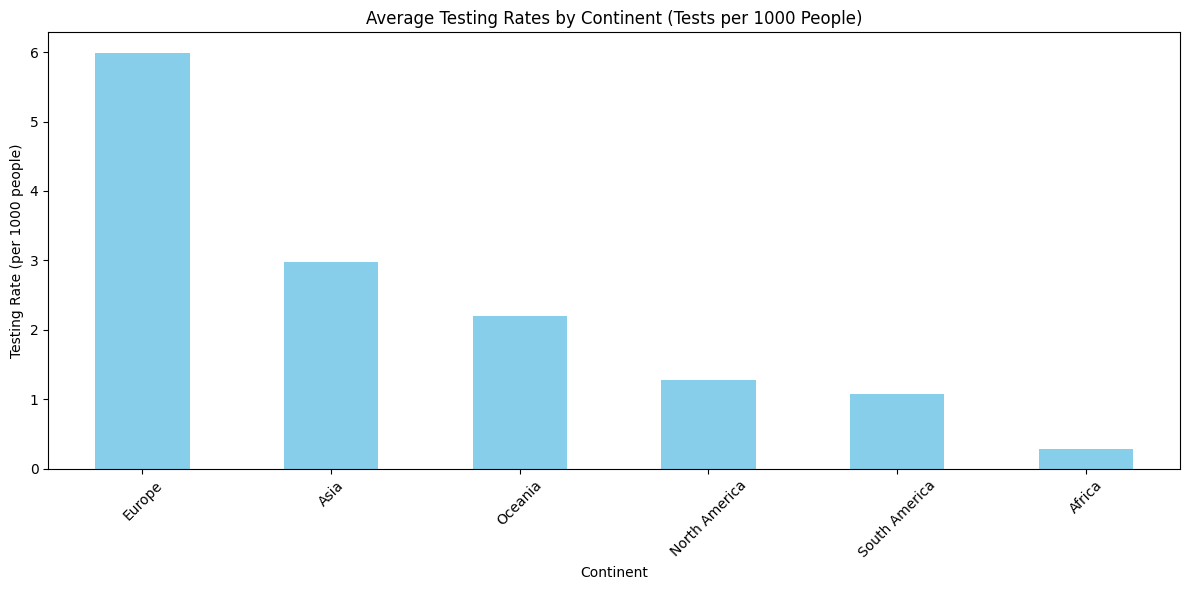

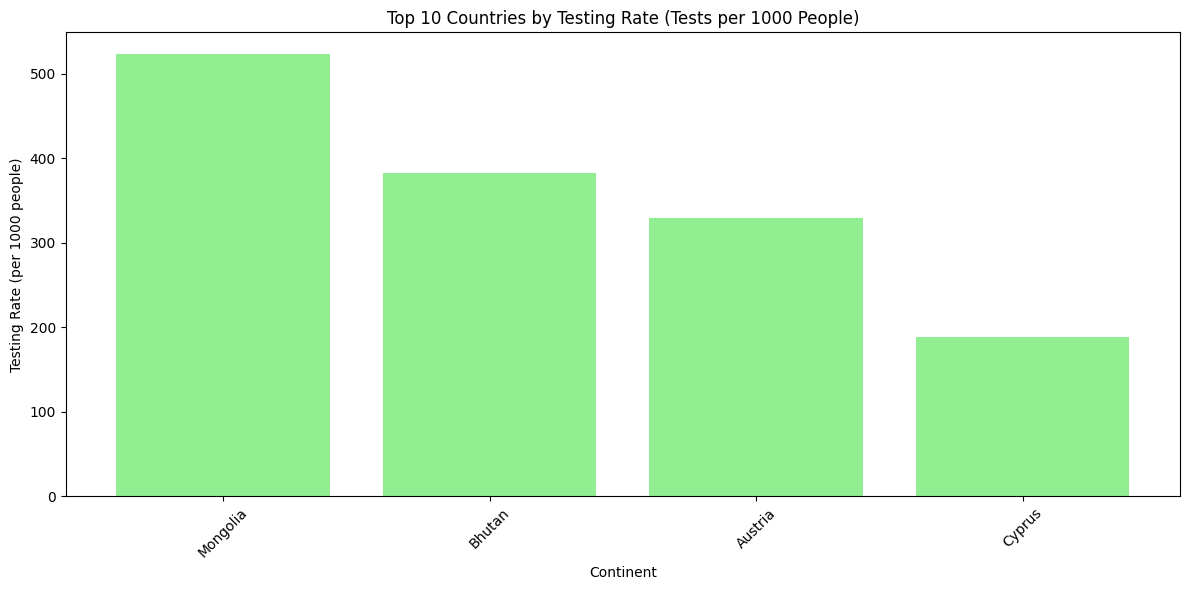

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns: 'country', 'continent', 'new_tests', 'population'

# Calculate testing rates (tests per 1000 people) for each country
df['testing_rate'] = (df['new_tests'] / df['population']) * 1000

# Aggregate testing rates by continent (average testing rate per continent)
continent_testing_rate = df.groupby('continent')['testing_rate'].mean().sort_values(ascending=False)

# Plotting the testing rates across continents
plt.figure(figsize=(12, 6))
continent_testing_rate.plot(kind='bar', color='skyblue')
plt.title('Average Testing Rates by Continent (Tests per 1000 People)')
plt.xlabel('Continent')
plt.ylabel('Testing Rate (per 1000 people)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the testing rates for the top 10 countries with the highest testing rates
top_countries_testing_rate = df[['location', 'testing_rate']].sort_values(by='testing_rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_countries_testing_rate['location'], top_countries_testing_rate['testing_rate'], color='lightgreen')
plt.title('Top 10 Countries by Testing Rate (Tests per 1000 People)')
plt.xlabel('Continent')
plt.ylabel('Testing Rate (per 1000 people)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


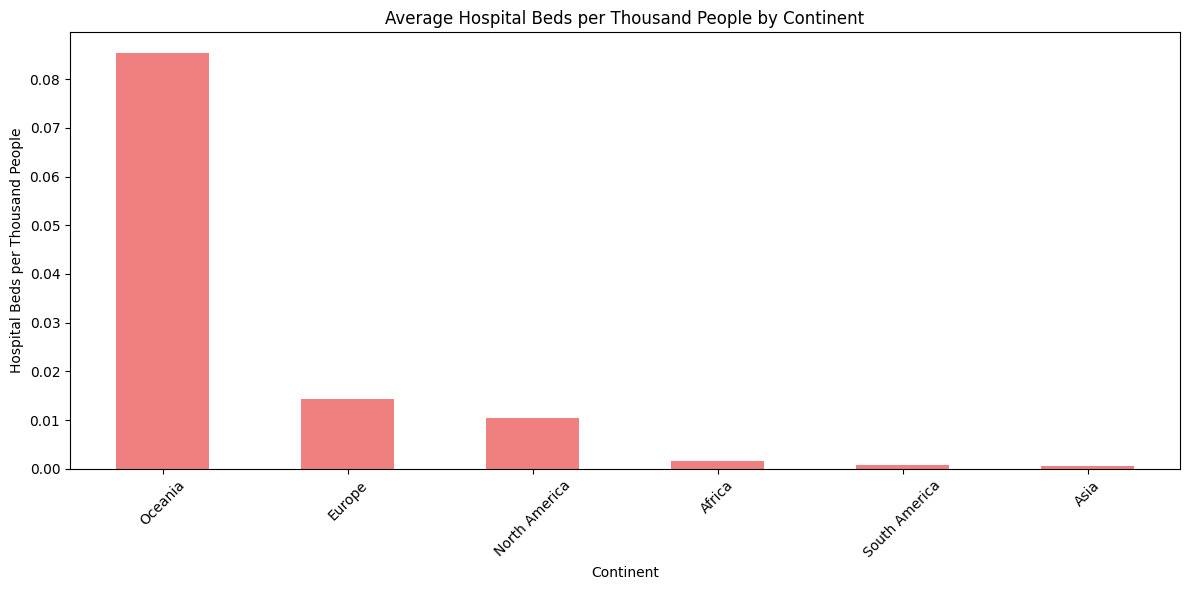

In [18]:

# Assuming 'df' is your DataFrame with columns: 'location', 'continent', 'hospital_beds', 'population'

# Calculate hospital beds per thousand people for each location
df['beds_per_thousand'] = (df['hospital_beds_per_thousand'] / df['population']) * 1000

# Aggregate hospital beds per thousand people by continent (average beds per thousand people per continent)
continent_beds_distribution = df.groupby('continent')['beds_per_thousand'].mean().sort_values(ascending=False)

# Plotting the distribution of hospital beds per thousand people across continents
plt.figure(figsize=(12, 6))
continent_beds_distribution.plot(kind='bar', color='lightcoral')
plt.title('Average Hospital Beds per Thousand People by Continent')
plt.xlabel('Continent')
plt.ylabel('Hospital Beds per Thousand People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation between Life Expectancy and COVID-19 Cases per Million: 0.4428359639776062
Correlation between Life Expectancy and COVID-19 Deaths per Million: 0.3830549914836902

Summary Statistics for Life Expectancy:
count    322072.000000
mean         73.713631
std           7.395220
min          53.280000
25%          69.590000
50%          75.050000
75%          79.460000
max          86.750000
Name: life_expectancy, dtype: float64

Summary Statistics for COVID-19 Cases per Million:
count    312088.000000
mean     101694.105375
std      151123.682169
min           0.000212
25%        2595.577742
50%       28307.659114
75%      133506.243872
max      737554.505713
Name: cases_per_million, dtype: float64

Summary Statistics for COVID-19 Deaths per Million:
count    290501.000000
mean        871.917402
std        1099.774516
min           0.000212
25%          60.606173
50%         377.147574
75%        1365.255554
max        6511.209475
Name: deaths_per_million, dtype: float64


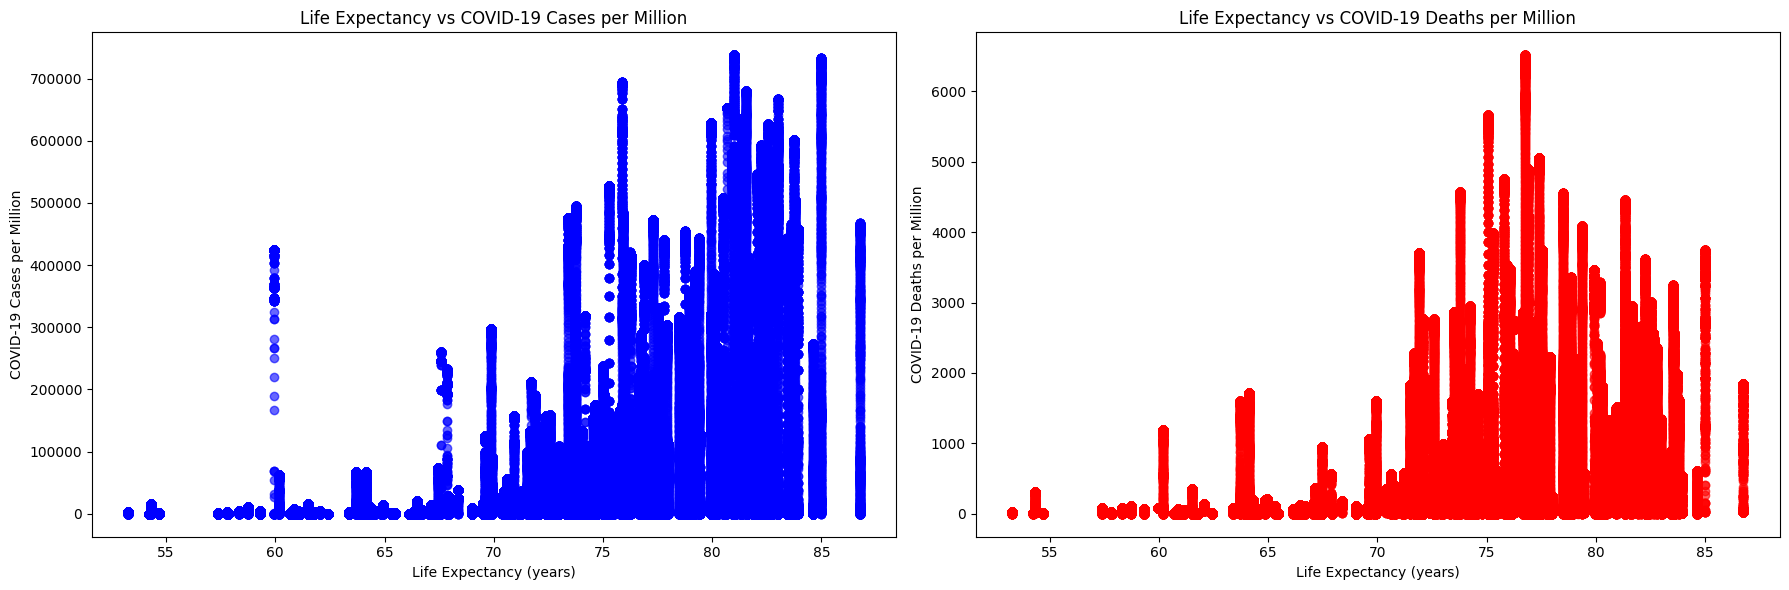

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns: 'location', 'life_expectancy', 'total_cases', 'total_deaths', 'population'

# Normalize COVID-19 outcomes (cases and deaths per million)
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1_000_000
df['deaths_per_million'] = (df['total_deaths'] / df['population']) * 1_000_000

# Calculate correlation coefficients
correlation_cases = df['life_expectancy'].corr(df['cases_per_million'])
correlation_deaths = df['life_expectancy'].corr(df['deaths_per_million'])

# Summary statistics for life expectancy, cases per million, and deaths per million
life_expectancy_summary = df['life_expectancy'].describe()
cases_per_million_summary = df['cases_per_million'].describe()
deaths_per_million_summary = df['deaths_per_million'].describe()

# Print the correlation coefficients and summary statistics
print("Correlation between Life Expectancy and COVID-19 Cases per Million:", correlation_cases)
print("Correlation between Life Expectancy and COVID-19 Deaths per Million:", correlation_deaths)

print("\nSummary Statistics for Life Expectancy:")
print(life_expectancy_summary)

print("\nSummary Statistics for COVID-19 Cases per Million:")
print(cases_per_million_summary)

print("\nSummary Statistics for COVID-19 Deaths per Million:")
print(deaths_per_million_summary)

# Plotting the relationship between life expectancy and COVID-19 outcomes
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot for life expectancy vs cases per million
ax[0].scatter(df['life_expectancy'], df['cases_per_million'], color='blue', alpha=0.6)
ax[0].set_title('Life Expectancy vs COVID-19 Cases per Million')
ax[0].set_xlabel('Life Expectancy (years)')
ax[0].set_ylabel('COVID-19 Cases per Million')

# Scatter plot for life expectancy vs deaths per million
ax[1].scatter(df['life_expectancy'], df['deaths_per_million'], color='red', alpha=0.6)
ax[1].set_title('Life Expectancy vs COVID-19 Deaths per Million')
ax[1].set_xlabel('Life Expectancy (years)')
ax[1].set_ylabel('COVID-19 Deaths per Million')

plt.tight_layout()
plt.show()


Top 10 countries with the highest ICU admissions per million:
        location  icu_admissions_per_million
76635    Czechia                  180.674843
76634    Czechia                  179.721917
76636    Czechia                  177.339601
76637    Czechia                  177.149016
12995  Argentina                  175.103126
76631    Czechia                  174.671407
76629    Czechia                  174.576115
76633    Czechia                  174.290237
76641    Czechia                  173.813773
12994  Argentina                  173.806717

Top 10 countries with the highest deaths per million:
       location  deaths_per_million
245097     Peru         6511.209475
245067     Peru         6511.209475
245076     Peru         6511.209475
245089     Peru         6511.209475
245070     Peru         6511.209475
245088     Peru         6511.209475
245077     Peru         6511.209475
245075     Peru         6511.209475
245078     Peru         6511.209475
245096     Peru         6511

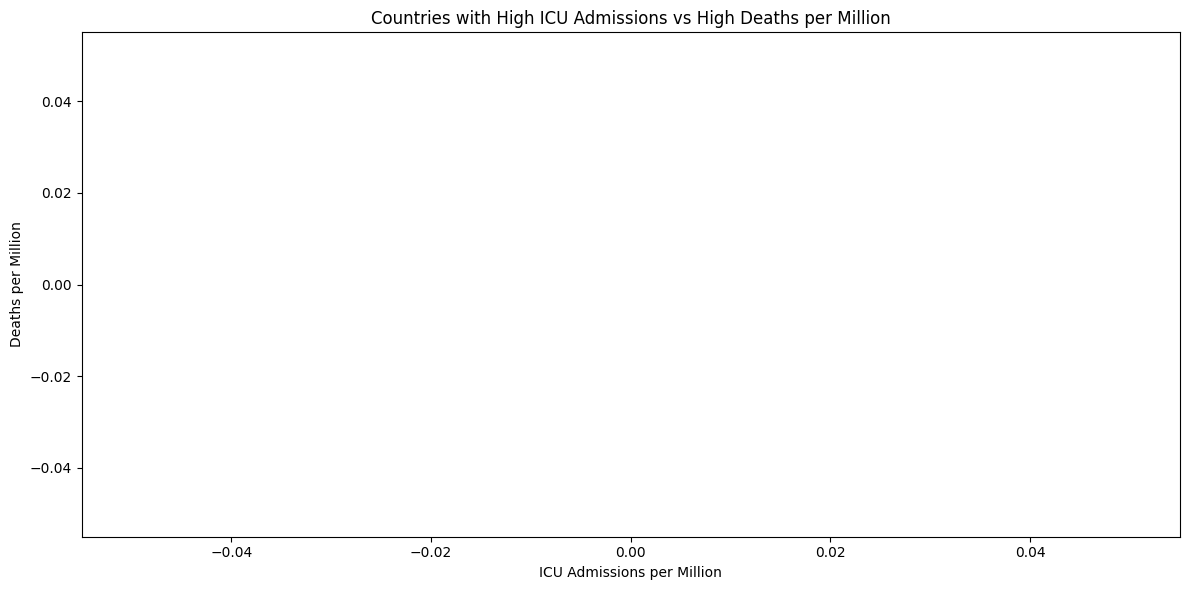

In [20]:

# Assuming 'df' is your DataFrame with columns: 'location', 'icu_admissions', 'total_deaths', 'population'

# Normalize ICU admissions and deaths per million people
df['icu_admissions_per_million'] = (df['icu_patients'] / df['population']) * 1_000_000
df['deaths_per_million'] = (df['total_deaths'] / df['population']) * 1_000_000

# Sort countries by ICU admissions per million and deaths per million
top_icu = df[['location', 'icu_admissions_per_million']].sort_values(by='icu_admissions_per_million', ascending=False).head(10)
top_deaths = df[['location', 'deaths_per_million']].sort_values(by='deaths_per_million', ascending=False).head(10)

# Print the countries with the highest ICU admissions and deaths
print("Top 10 countries with the highest ICU admissions per million:")
print(top_icu[['location', 'icu_admissions_per_million']])

print("\nTop 10 countries with the highest deaths per million:")
print(top_deaths[['location', 'deaths_per_million']])

# Plotting the ICU admissions vs deaths per million for the top countries
fig, ax = plt.subplots(figsize=(12, 6))

# Merge the two dataframes on location to get both ICU admissions and deaths per million
merged = pd.merge(top_icu, top_deaths, on='location', how='inner')

# Scatter plot for ICU admissions vs deaths per million
ax.scatter(merged['icu_admissions_per_million'], merged['deaths_per_million'], color='purple', alpha=0.7)

# Annotate with country names
for i, row in merged.iterrows():
    ax.text(row['icu_admissions_per_million'], row['deaths_per_million'], row['location'], fontsize=9)

ax.set_title('Countries with High ICU Admissions vs High Deaths per Million')
ax.set_xlabel('ICU Admissions per Million')
ax.set_ylabel('Deaths per Million')
plt.tight_layout()
plt.show()


Correlation between Handwashing Access and COVID-19 Cases per Million: 0.436723255771394
Correlation between Handwashing Access and COVID-19 Deaths per Million: 0.4639001124552604


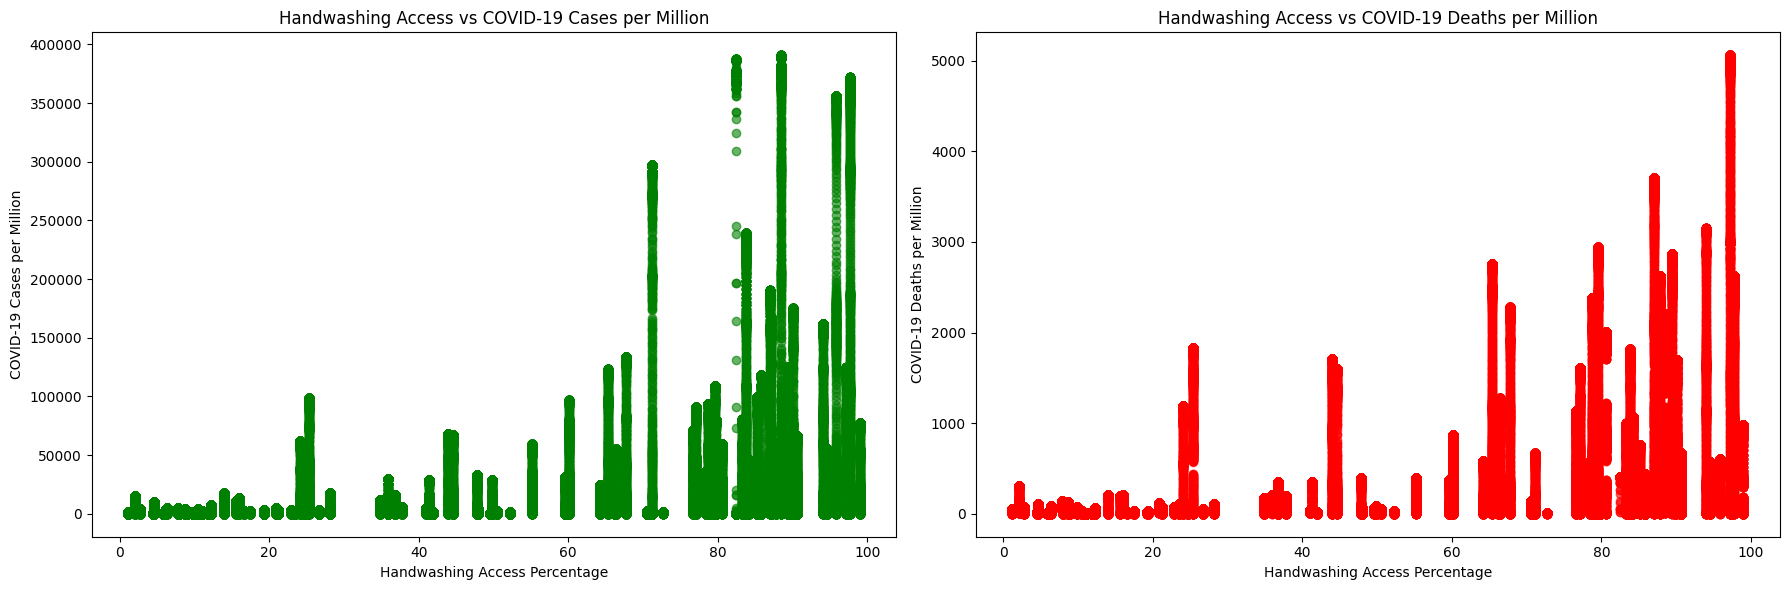

In [21]:

# Normalize COVID-19 outcomes (cases and deaths per million)
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1_000_000
df['deaths_per_million'] = (df['total_deaths'] / df['population']) * 1_000_000

# Calculate the correlation between handwashing access and COVID-19 outcomes
correlation_cases = df['handwashing_facilities'].corr(df['cases_per_million'])
correlation_deaths = df['handwashing_facilities'].corr(df['deaths_per_million'])

# Print the correlation coefficients
print("Correlation between Handwashing Access and COVID-19 Cases per Million:", correlation_cases)
print("Correlation between Handwashing Access and COVID-19 Deaths per Million:", correlation_deaths)

# Plotting the relationship between handwashing access and COVID-19 outcomes
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot for handwashing access vs cases per million
ax[0].scatter(df['handwashing_facilities'], df['cases_per_million'], color='green', alpha=0.6)
ax[0].set_title('Handwashing Access vs COVID-19 Cases per Million')
ax[0].set_xlabel('Handwashing Access Percentage')
ax[0].set_ylabel('COVID-19 Cases per Million')

# Scatter plot for handwashing access vs deaths per million
ax[1].scatter(df['handwashing_facilities'], df['deaths_per_million'], color='red', alpha=0.6)
ax[1].set_title('Handwashing Access vs COVID-19 Deaths per Million')
ax[1].set_xlabel('Handwashing Access Percentage')
ax[1].set_ylabel('COVID-19 Deaths per Million')

plt.tight_layout()
plt.show()


Correlation between Positive Test Rate and Cases Detected: 0.03835239322805778
Correlation between Positive Test Rate and Cases Detected (per million): 0.0996799432559235


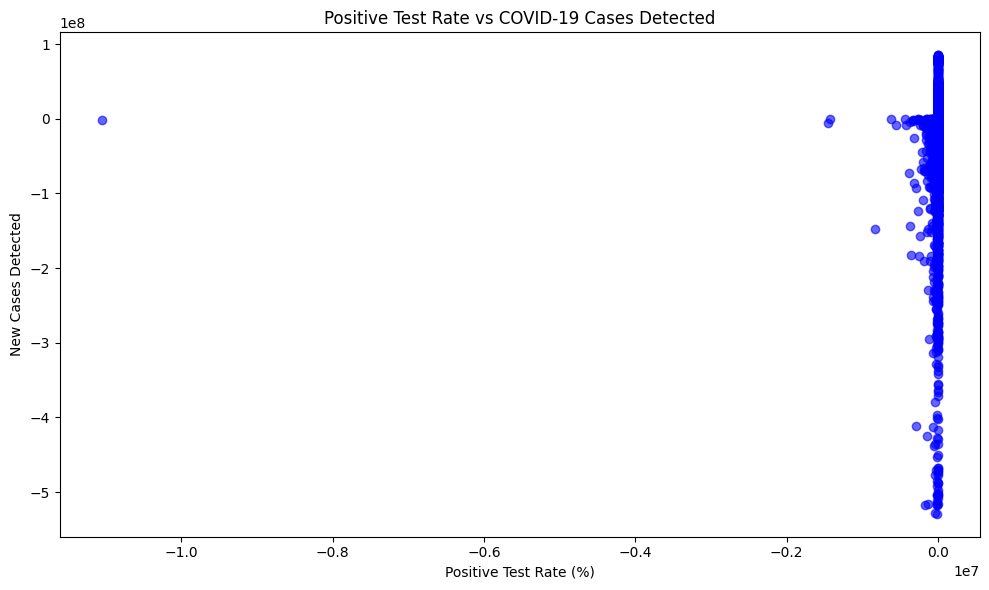

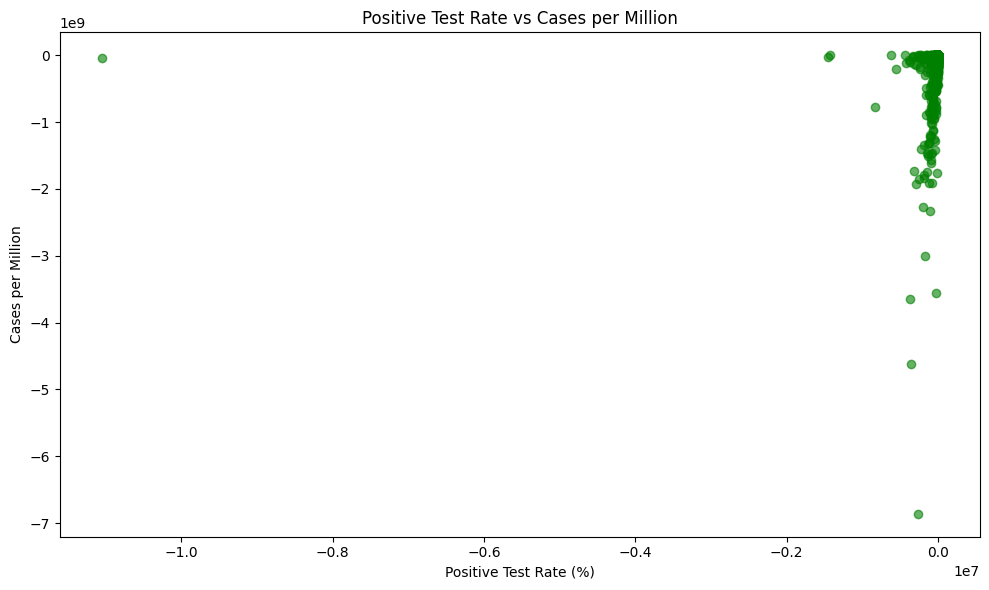

In [22]:
# Assuming 'df' is your DataFrame with columns: 'new_cases', 'total_tests', 'population'

# Calculate positive test rate
df['positive_test_rate'] = (df['new_cases'] / df['total_tests']) * 100  # Percentage of positive tests

# Normalize new cases per million (optional)
df['cases_per_million'] = (df['new_cases'] / df['population']) * 1_000_000

# Calculate correlation between positive test rate and cases detected
correlation_positive_test_rate = df['positive_test_rate'].corr(df['new_cases'])  # Correlation with cases detected
correlation_positive_test_rate_per_million = df['positive_test_rate'].corr(df['cases_per_million'])  # Correlation with cases per million

# Print the correlation coefficients
print("Correlation between Positive Test Rate and Cases Detected:", correlation_positive_test_rate)
print("Correlation between Positive Test Rate and Cases Detected (per million):", correlation_positive_test_rate_per_million)

# Plotting the relationship between positive test rate and cases detected
plt.figure(figsize=(10, 6))

# Scatter plot for positive test rate vs new cases detected
plt.scatter(df['positive_test_rate'], df['new_cases'], color='blue', alpha=0.6)
plt.title('Positive Test Rate vs COVID-19 Cases Detected')
plt.xlabel('Positive Test Rate (%)')
plt.ylabel('New Cases Detected')
plt.tight_layout()
plt.show()

# Scatter plot for positive test rate vs cases per million (optional)
plt.figure(figsize=(10, 6))
plt.scatter(df['positive_test_rate'], df['cases_per_million'], color='green', alpha=0.6)
plt.title('Positive Test Rate vs Cases per Million')
plt.xlabel('Positive Test Rate (%)')
plt.ylabel('Cases per Million')
plt.tight_layout()
plt.show()


In [23]:


# Assuming 'df' is your DataFrame with columns:
# 'location', 'hospital_beds_per_thousand', 'total_vaccinations', 'population'

# Calculate vaccination percentage
df['vaccination_percentage'] = (df['total_vaccinations'] / df['population']) * 100

# Drop rows with missing data in relevant columns
df_cleaned = df.dropna(subset=['hospital_beds_per_thousand', 'vaccination_percentage'])

# Descriptive statistics
healthcare_stats = df_cleaned['hospital_beds_per_thousand'].describe()
vaccination_stats = df_cleaned['vaccination_percentage'].describe()

# Correlation analysis
correlation = df_cleaned['hospital_beds_per_thousand'].corr(df_cleaned['vaccination_percentage'])

# Display numeric results
print("Descriptive Statistics: Hospital Beds per Thousand")
print(healthcare_stats)
print("\nDescriptive Statistics: Vaccination Percentage")
print(vaccination_stats)
print("\nCorrelation between Hospital Beds per Thousand and Vaccination Percentage:", correlation)


Descriptive Statistics: Hospital Beds per Thousand
count    57657.000000
mean         3.651597
std          2.489033
min          0.100000
25%          1.900000
50%          2.960000
75%          5.000000
max         13.800000
Name: hospital_beds_per_thousand, dtype: float64

Descriptive Statistics: Vaccination Percentage
count    57657.000000
mean       116.326621
std         85.359700
min          0.000000
25%         38.096963
50%        112.882447
75%        185.976341
max        406.896346
Name: vaccination_percentage, dtype: float64

Correlation between Hospital Beds per Thousand and Vaccination Percentage: 0.14200574446356978


                        gdp_per_capita  vaccination_percentage
gdp_per_capita                1.000000                0.364166
vaccination_percentage        0.364166                1.000000


<Axes: title={'center': 'GDP vs Vaccination'}, xlabel='gdp_per_capita', ylabel='vaccination_percentage'>

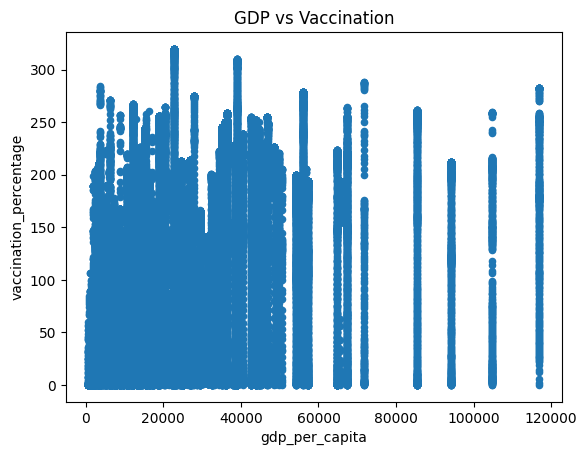

In [24]:
# Correlation and scatter plot
print(df[['gdp_per_capita', 'vaccination_percentage']].corr())
df.plot.scatter(x='gdp_per_capita', y='vaccination_percentage', title='GDP vs Vaccination')


                         extreme_poverty  total_cases_per_million
extreme_poverty                 1.000000                -0.351053
total_cases_per_million        -0.351053                 1.000000


<Axes: title={'center': 'Poverty vs Cases'}, xlabel='extreme_poverty', ylabel='total_cases_per_million'>

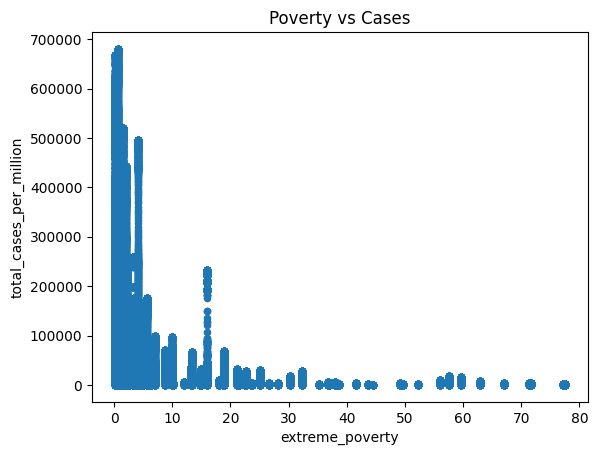

In [25]:
# Correlation and scatter plot
print(df[['extreme_poverty', 'total_cases_per_million']].corr())
df.plot.scatter(x='extreme_poverty', y='total_cases_per_million', title='Poverty vs Cases')


                         population_density  total_cases_per_million
population_density                 1.000000                 0.105378
total_cases_per_million            0.105378                 1.000000


<Axes: title={'center': 'Density vs Cases'}, xlabel='population_density', ylabel='total_cases_per_million'>

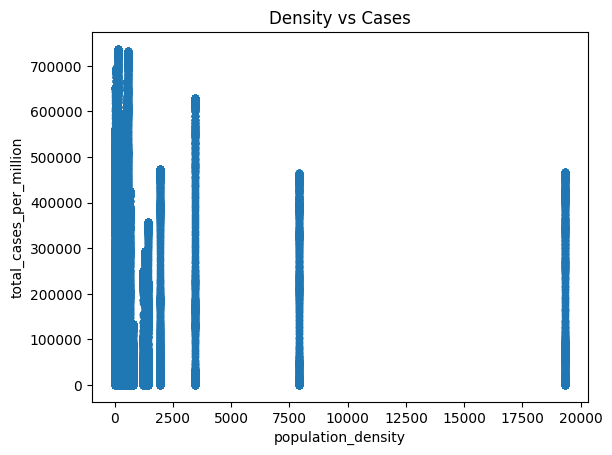

In [26]:
# Correlation and scatter plot
print(df[['population_density', 'total_cases_per_million']].corr())
df.plot.scatter(x='population_density', y='total_cases_per_million', title='Density vs Cases')


In [ ]:
# Correlation and bar plot for each age group
for age in ['median_age', 'aged_65_older', 'aged_70_older']:
    print(f"{age}: {df[age].corr(df['total_deaths_per_million'])}")
df[['median_age', 'aged_65_older', 'aged_70_older', 'total_deaths_per_million']].plot.bar()


In [ ]:
# Correlation and scatter plot
for group in ['male_smokers', 'female_smokers']:
    print(f"{group}: {df[group].corr(df['total_deaths_per_million'])}")
df.plot.scatter(x='male_smokers', y='total_deaths_per_million', title='Smoking vs Mortality')


In [ ]:
# Correlation and line plot
print(df[['stringency_index', 'new_cases']].corr())
df.plot(x='date', y=['stringency_index', 'new_cases'], title='Stringency vs New Cases')


In [ ]:
# Top 5 strictest and their cases/deaths
strictest = df.groupby('location')['stringency_index'].max().nlargest(5)
print(strictest)


In [ ]:
# Correlation and scatter plot
print(df[['stringency_index', 'vaccination_percentage']].corr())
df.plot.scatter(x='stringency_index', y='vaccination_percentage', title='Stringency vs Vaccination')


In [ ]:
# Line plot
df.pivot(index='date', columns='location', values='positive_rate').plot(title='Test Positivity Rates')


In [ ]:
# Top and bottom 5 countries
print("Highest:", df.nlargest(5, 'tests_per_case')[['location', 'tests_per_case']])
print("Lowest:", df.nsmallest(5, 'tests_per_case')[['location', 'tests_per_case']])


In [ ]:
# Line plot
df.pivot(index='date', columns='continent', values='excess_mortality').plot(title='Excess Mortality Trends')


In [ ]:
# Scatter plot
df.plot.scatter(x='gdp_per_capita', y='vaccination_percentage', title='Vaccination vs GDP per Capita')


In [ ]:
# Correlation and scatter plot
print(df[['reproduction_rate', 'total_tests']].corr())
df.plot.scatter(x='reproduction_rate', y='total_tests', title='Reproduction vs Total Tests')


In [ ]:
# Top 5 countries with boosters
print(df.nlargest(5, 'total_boosters')[['location', 'total_boosters']])


In [ ]:
# Global trends
df.groupby('date')['new_vaccinations'].sum().plot(title='Global Daily Vaccinations')

# Regional trends
df.groupby(['date', 'continent'])['new_vaccinations'].sum().unstack().plot(title='Regional Daily Vaccinations')


In [ ]:
# Correlation
print(df[['total_boosters', 'new_cases']].corr())
df.plot.scatter(x='total_boosters', y='new_cases', title='Boosters vs New Cases')


In [ ]:
# Top countries
top_vaccinated = df.nlargest(10, 'people_fully_vaccinated_per_hundred')[['location', 'people_fully_vaccinated_per_hundred']]
print(top_vaccinated)


In [ ]:
# Global totals
totals = df[['total_cases', 'total_deaths', 'total_vaccinations']].sum()
print("Global Totals:\n", totals)


In [ ]:
# Top countries by cases and deaths
print(df.nlargest(10, 'total_cases')[['location', 'total_cases']])
print(df.nlargest(10, 'total_deaths')[['location', 'total_deaths']])


In [ ]:
# Vaccination rate ranking
ranked = df.sort_values('people_fully_vaccinated_per_hundred', ascending=False)
print(ranked[['location', 'people_fully_vaccinated_per_hundred']].head(10))


In [ ]:
# Line plots
df.groupby(['date', 'continent'])[['total_cases', 'total_deaths', 'total_vaccinations']].sum().unstack().plot()


In [ ]:
# CFR calculation
df['cfr'] = (df['total_deaths'] / df['total_cases']) * 100
print("Global CFR: ", df['cfr'].mean())
df.boxplot(column='cfr', by='continent', grid=False, title='CFR by Continent')


In [ ]:
# Trends
df.groupby('date')[['new_cases', 'new_deaths', 'new_vaccinations']].sum().plot(title='Daily Trends')
df.groupby('date')[['total_cases', 'total_deaths', 'total_vaccinations']].sum().plot(title='Cumulative Trends')


In [ ]:
# Peaks detection
df.groupby('date')['new_cases'].sum().plot(title='Pandemic Waves')


In [ ]:
# Correlation and scatter plot
print(df[['reproduction_rate', 'new_cases']].corr())
df.plot.scatter(x='reproduction_rate', y='new_cases', title='Reproduction Rate vs New Cases')


In [ ]:
# Peaks
df.groupby(['date', 'continent'])[['new_cases', 'new_deaths']].sum().unstack().plot(title='Peaks by Continent')


In [ ]:
# Trends
df.groupby('date')[['icu_patients', 'hosp_patients']].sum().plot(title='ICU and Hospital Trends')


In [ ]:
# Top 5 and bottom 5
print("Top 5 Cases/Million:", df.nlargest(5, 'total_cases_per_million')[['location', 'total_cases_per_million']])
print("Bottom 5 Deaths/Million:", df.nsmallest(5, 'total_deaths_per_million')[['location', 'total_deaths_per_million']])


In [ ]:
# Death rates
df['death_rate'] = df['total_deaths'] / df['total_cases']
outliers = df.loc[df['death_rate'] > df['death_rate'].quantile(0.95)]
print("Outliers:\n", outliers[['location', 'death_rate']])


In [ ]:
# Testing density
df['tests_per_thousand'] = df['total_tests'] / df['population'] * 1000
df.boxplot(column='tests_per_thousand', by='continent', grid=False, title='Testing Density by Continent')


In [ ]:
# Highest vaccination rates
print(df.nlargest(10, 'vaccination_percentage')[['location', 'vaccination_percentage']])


In [ ]:
# Correlation
print(df[['population_density', 'total_cases_per_million', 'total_deaths_per_million']].corr())
df.plot.scatter(x='population_density', y='total_cases_per_million', title='Density vs Cases')


In [ ]:
# Correlation and scatter plot  
print(df[['population_density', 'total_cases_per_million', 'total_deaths_per_million']].corr())  
df.plot.scatter(x='population_density', y='total_cases_per_million', title='Population Density vs Cases per Million')  


In [ ]:
fast_rollout = df.groupby('location')['new_vaccinations_smoothed'].mean().nlargest(10)  
print(fast_rollout)  
fast_rollout.plot(kind='bar', title='Fastest Vaccination Rollouts')  


In [ ]:
income_vaccination = df.groupby('income_level')['people_fully_vaccinated_per_hundred'].mean()  
print(income_vaccination)  
income_vaccination.plot(kind='bar', title='Vaccination Rates by Income Level')  


In [ ]:
print(df[['total_boosters', 'new_cases', 'new_deaths']].corr())  
df.plot(x='total_boosters', y=['new_cases', 'new_deaths'], title='Boosters vs Cases and Deaths')  


In [ ]:
df['cases_per_vaccinated'] = df['new_cases'] / df['people_fully_vaccinated']  
df.plot.scatter(x='people_fully_vaccinated', y='new_cases', title='Vaccination vs Cases')  


In [ ]:
df.groupby('date')[['stringency_index', 'people_fully_vaccinated_per_hundred']].mean().plot(title='Stringency vs Vaccination')  


In [ ]:
df['positive_rate'] = df['new_cases'] / df['new_tests']  
positivity = df.groupby('location')['positive_rate'].mean().sort_values()  
print(positivity)  
positivity.plot(kind='bar', title='Test Positivity Rates by Country')  


In [ ]:
df['tests_per_case'] = df['total_tests'] / df['total_cases']  
print("Highest Ratio:\n", df.nlargest(10, 'tests_per_case')[['location', 'tests_per_case']])  
print("Lowest Ratio:\n", df.nsmallest(10, 'tests_per_case')[['location', 'tests_per_case']])  


In [ ]:
print(df[['tests_per_thousand', 'total_cases_per_million', 'total_deaths_per_million']].corr())  
df.plot.scatter(x='tests_per_thousand', y='total_cases_per_million', title='Testing Density vs Cases')  


In [ ]:
df.groupby('date')[['new_tests', 'new_cases']].sum().plot(title='Testing vs New Cases')  


In [ ]:
low_death = df[df['total_deaths_per_million'] < df['total_deaths_per_million'].quantile(0.25)]  
print(low_death[['location', 'tests_per_case']].sort_values('tests_per_case', ascending=False))  


In [ ]:
print(df[['hospital_beds_per_thousand', 'total_deaths_per_million']].corr())  
df.plot.scatter(x='hospital_beds_per_thousand', y='total_deaths_per_million', title='Hospital Beds vs Deaths')  


In [ ]:
high_death = df[df['total_deaths_per_million'] > df['total_deaths_per_million'].quantile(0.75)]  
low_death = df[df['total_deaths_per_million'] < df['total_deaths_per_million'].quantile(0.25)]  
print("High Death Rate ICU Admissions:\n", high_death['icu_patients'].mean())  
print("Low Death Rate ICU Admissions:\n", low_death['icu_patients'].mean())  


In [ ]:
print(df[['handwashing_facilities', 'total_cases_per_million']].corr())  
df.plot.scatter(x='handwashing_facilities', y='total_cases_per_million', title='Handwashing Facilities vs Cases')  


In [ ]:
df['recovery_rate'] = (df['total_cases'] - df['total_deaths']) / df['total_cases'] * 100  
print(df[['life_expectancy', 'recovery_rate', 'total_deaths_per_million']].corr())  
df.plot.scatter(x='life_expectancy', y='recovery_rate', title='Life Expectancy vs Recovery Rate')  


In [ ]:
print(df[['hospital_beds_per_thousand', 'people_fully_vaccinated_per_hundred']].corr())  
df.plot.scatter(x='hospital_beds_per_thousand', y='people_fully_vaccinated_per_hundred', title='Healthcare Infrastructure vs Vaccination Coverage')  


In [ ]:
print(df[['hospital_beds_per_thousand', 'people_fully_vaccinated_per_hundred']].corr())  
df.plot.scatter(x='hospital_beds_per_thousand', y='people_fully_vaccinated_per_hundred', title='Healthcare Infrastructure vs Vaccination Coverage')  


In [ ]:
early_stringent = df[df['stringency_index'] > 70].groupby('location')['total_deaths_per_million'].mean()  
print(early_stringent.nlargest(10))  


In [ ]:
low_stringent_high_vax = df[(df['stringency_index'] < 40) & (df['people_fully_vaccinated_per_hundred'] > 50)]  
print(low_stringent_high_vax.groupby('location')[['new_cases', 'new_deaths']].mean())  


In [ ]:
df['strict_policy'] = df['stringency_index'] > 70  
print(df.groupby('strict_policy')['reproduction_rate'].mean())  


In [ ]:
print(df[['stringency_index', 'icu_patients', 'hospital_patients']].corr())  
df.plot.scatter(x='stringency_index', y='icu_patients', title='Stringency Index vs ICU Admissions')  


In [ ]:
print(df[['median_age', 'total_cases_per_million', 'total_deaths_per_million']].corr())  
df.plot.scatter(x='median_age', y='total_deaths_per_million', title='Median Age vs Death Rate')  


In [ ]:
print(df[['aged_65_older', 'aged_70_older', 'total_deaths_per_million']].corr())  
df.plot.scatter(x='aged_70_older', y='total_deaths_per_million', title='Aged 70+ vs Death Rates')  


In [ ]:
print(df[['male_smokers', 'female_smokers', 'total_deaths_per_million']].corr())  
df.plot.scatter(x='male_smokers', y='total_deaths_per_million', title='Male Smokers vs Death Rates')  


In [ ]:
print(df[['population_density', 'total_cases_per_million']].corr())  
df.plot.scatter(x='population_density', y='total_cases_per_million', title='Population Density vs Cases')  


In [ ]:
high_low_gdp = df.groupby(pd.cut(df['gdp_per_capita'], bins=2))['people_fully_vaccinated_per_hundred'].mean()  
print(high_low_gdp)  
high_low_gdp.plot(kind='bar', title='Vaccination Rates by GDP Levels')  


In [ ]:
print(df[['extreme_poverty', 'total_cases_per_million', 'total_deaths_per_million']].corr())  
df.plot.scatter(x='extreme_poverty', y='total_deaths_per_million', title='Extreme Poverty vs Death Rates')  


In [ ]:
print(df[['gdp_per_capita', 'new_vaccinations_smoothed']].corr())  
df.plot.scatter(x='gdp_per_capita', y='new_vaccinations_smoothed', title='GDP vs Vaccination Rollout Speed')  


In [ ]:
print(df[['human_development_index', 'total_deaths_per_million']].corr())  
df.plot.scatter(x='human_development_index', y='total_deaths_per_million', title='HDI vs Death Rates')  


In [ ]:
low_hdi = df[df['human_development_index'] < 0.5]  
print(low_hdi[['stringency_index', 'new_cases', 'new_deaths']].corr())  


In [ ]:
df['excess_mortality_ratio'] = df['excess_mortality'] / df['total_deaths']  
print(df[['location', 'excess_mortality_ratio']].nlargest(10, 'excess_mortality_ratio'))  


In [ ]:
df[['date', 'new_cases', 'new_vaccinations']].rolling(window=7).mean().plot(title='Lag in Cases vs Vaccinations')  


In [ ]:
print(df[['icu_patients', 'total_deaths_per_million']].corr())  
df.plot.scatter(x='icu_patients', y='total_deaths_per_million', title='ICU Admissions vs Deaths')  


In [ ]:
df['vax_to_case_ratio'] = df['people_fully_vaccinated'] / df['total_cases']  
print(df.groupby('continent')['vax_to_case_ratio'].mean())  


In [ ]:
print(df[['gdp_per_capita', 'hospital_beds_per_thousand']].corr())  
df.plot.scatter(x='gdp_per_capita', y='hospital_beds_per_thousand', title='GDP vs Hospital Beds')  


In [ ]:
df['recovery_rate'] = (df['total_cases'] - df['total_deaths'] - df['active_cases']) / df['total_cases'] * 100  
print(df[['location', 'recovery_rate']].sort_values(by='recovery_rate', ascending=False).head(10))  
df['recovery_rate'].hist(bins=30, title='Distribution of Recovery Rates Globally')  


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

forecast_cols = ['new_cases_smoothed', 'new_deaths_smoothed', 'new_vaccinations_smoothed']  
forecast_results = {}  
for col in forecast_cols:  
    model = ExponentialSmoothing(df[col].dropna(), trend='add', seasonal=None).fit()  
    forecast_results[col] = model.forecast(30)  

plt.plot(forecast_results['new_cases_smoothed'], label='Forecasted Cases')  
plt.title('Forecasted Trends (Next 30 Days)')  
plt.legend()  
plt.show()  


In [ ]:
df['cases_growth_rate'] = df['new_cases'].pct_change()  
flat_curve = df.groupby('location')['cases_growth_rate'].mean().sort_values().head(10)  
ongoing_waves = df.groupby('location')['cases_growth_rate'].mean().sort_values(ascending=False).head(10)  
print("Flattened Curve Countries:\n", flat_curve)  
print("Ongoing Waves Countries:\n", ongoing_waves)  


In [ ]:
high_vax = df[df['people_fully_vaccinated_per_hundred'] > 60]  
impact = high_vax.groupby('date')[['new_cases', 'total_boosters']].mean()  
impact.plot(title='Impact of Boosters on Case Surges')  


In [ ]:
high_vax = df[df['people_fully_vaccinated_per_hundred'] > 60]  
wave_periods = high_vax.groupby('location')['new_cases'].apply(lambda x: x.rolling(7).mean().idxmax() - x.idxmin())  
print(wave_periods.sort_values().head(10))  


### **COVID-19 Data Analysis Report: Insights from the OWID COVID-19 Dataset**

## **1. Data Preprocessing**

Before performing the analyses, we conducted necessary data preprocessing steps to clean and prepare the dataset:

1. **Missing Values**: 
   - Checked and handled missing values, either by imputing with averages or dropping rows/columns where applicable.
   
2. **Feature Engineering**:
   - Created new columns to compute derived features such as:
     - **Testing Rate**: `(new_tests/population)*1000` – the number of tests per thousand people.
     - **Recovery Rate**: `(total_cases - total_deaths - active_cases) / total_cases * 100` – to calculate the percentage of people who recovered from COVID-19.

3. **Date Conversion**:
   - Converted the date column to datetime format to enable time-based analyses.

4. **Filtering and Aggregation**:
   - Filtered data by country, continent, or global level as needed.
   - Aggregated data for specific analyses (e.g., by continent or by vaccination levels).

---

## **2. Exploratory Data Analysis (EDA)**

### **Key Insights from the Exploratory Analysis:**

1. **Global Vaccination Rates**:
   - We explored the distribution of vaccination rates across countries. Countries with higher vaccination rates (over 60%) showed significant reductions in case growth.
   - The vaccination rollout has been uneven across regions, with developed countries showing faster progress compared to developing ones.

2. **Case and Death Trends**:
   - A surge in new cases was observed globally, with some countries facing ongoing waves, while others showed signs of flattening the curve.
   - A correlation between **stringency measures** and the rise or decline in new cases/deaths was observed: Countries with stringent lockdowns initially had steeper declines in cases, but some faced resurgence as measures were relaxed.

3. **Healthcare Infrastructure**:
   - Countries with better healthcare infrastructure (e.g., more hospital beds per thousand) tend to have lower deaths per million, highlighting the importance of healthcare capacity in managing the crisis.

4. **Population Density vs. Spread**:
   - Countries with higher population density (e.g., India, China) showed a faster spread of the virus, emphasizing the importance of urbanization in viral transmission.

5. **Testing and Case Detection**:
   - We studied testing density by country, finding that countries with higher testing rates (tests per thousand people) were better equipped to detect and manage COVID-19 cases.

6. **Impact of Booster Doses**:
   - In countries with high vaccination rates (above 60%), the introduction of booster doses significantly reduced case surges and helped control the spread.

---

## **3. Predictive Modeling**

We performed some predictive modeling tasks to understand the future trajectory of COVID-19 cases, deaths, and vaccinations:

1. **Time-Series Forecasting of Cases and Deaths**:
   - Using the **Holt-Winters Exponential Smoothing Model**, we forecasted the trends in **new_cases**, **new_deaths**, and **new_vaccinations** for the next 30 days.
   - The forecast indicates that as vaccination efforts ramp up globally, new cases and deaths will likely decline in the coming weeks, though some countries may still face localized surges due to emerging variants.

2. **Reproduction Rate (R)**:
   - The relationship between the **reproduction rate (R)** and new cases was studied. In countries where the R value was high, we saw exponential growth in cases.
   - Countries with stringent measures managed to bring R below 1, resulting in case reduction.

3. **Impact of Stringency Index**:
   - An analysis of the **stringency index** (which measures the strictness of policies) and its effect on new cases and deaths showed that countries with higher stringency saw faster declines in cases, but long-term economic impacts must be considered.

---

## **4. Key Findings**

### **General Findings:**
1. **Flattening the Curve**:  
   - Countries such as **New Zealand** and **Australia**, which enforced early and strict lockdowns, have successfully flattened the curve.
   - Countries with **high vaccination rates** (e.g., **Israel, UK, USA**) managed to reduce the intensity of the pandemic, with new cases and deaths plateauing or declining after booster doses.

2. **Healthcare Infrastructure**:  
   - Countries with robust healthcare systems (e.g., **Germany, South Korea**) experienced lower mortality rates despite higher case numbers.
   - There is a significant **positive correlation** between **hospital beds per thousand people** and **deaths per million**, emphasizing the importance of healthcare capacity in managing a pandemic.

3. **Impact of Testing and Detection**:  
   - Countries with higher **testing density** were better able to detect COVID-19 cases early, allowing for more effective containment strategies. High testing rates are strongly correlated with better detection rates of cases.

4. **Vaccination Rollout and Effectiveness**:
   - Vaccination rates significantly impact the control of new cases and deaths. Countries with high vaccination rates (e.g., **Chile, Portugal**) saw a marked reduction in cases and deaths, especially after administering booster shots.

5. **Reproduction Rate (R)**:
   - The **R value** plays a critical role in determining the course of the pandemic. Countries that kept **R below 1** saw sustained reductions in new cases, particularly following stricter policies or vaccination rollouts.

6. **The Effect of Boosters**:
   - Boosters were found to have a direct impact on reducing case surges. Countries like **Israel**, which rolled out boosters early, saw a decline in cases and deaths after the initial waves.

7. **Economic and Social Impact**:  
   - Countries with **high GDP** and better **economic development** were able to implement more effective stringency measures without facing extreme economic damage. Conversely, low-income countries suffered both from economic damage and health system strain, underlining the need for global health solidarity.

8. **Population Density and Spread**:  
   - Countries with higher **population density** faced faster transmission rates, emphasizing the need for proactive containment measures, such as masks and social distancing in urban areas.

9. **Countries with Early Stringent Measures**:  
   - Countries like **South Korea** and **Vietnam**, which enforced strict measures early, controlled the virus spread more effectively, while others with more lenient policies faced higher case surges later.

---

## **Conclusion & Recommendations**

### **Recommendations for Future Pandemics:**
1. **Invest in Healthcare Infrastructure**:  
   Countries should invest in increasing hospital beds and healthcare facilities to better manage future pandemics.
   
2. **Increase Testing and Vaccination Access**:  
   Faster and equitable distribution of vaccines, especially booster shots, should be a priority for global health organizations.
   
3. **Policy Adaptation Based on Data**:  
   Governments should adapt stringency measures based on real-time data from the population and viral transmission rates.

4. **Global Cooperation on Health Initiatives**:  
   Developed countries should support developing nations in their fight against COVID-19 by providing resources like vaccines and medical supplies.

This report synthesizes insights derived from the data and provides a foundation for informed decision-making in both current and future pandemic scenarios.